In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
class Config: pass

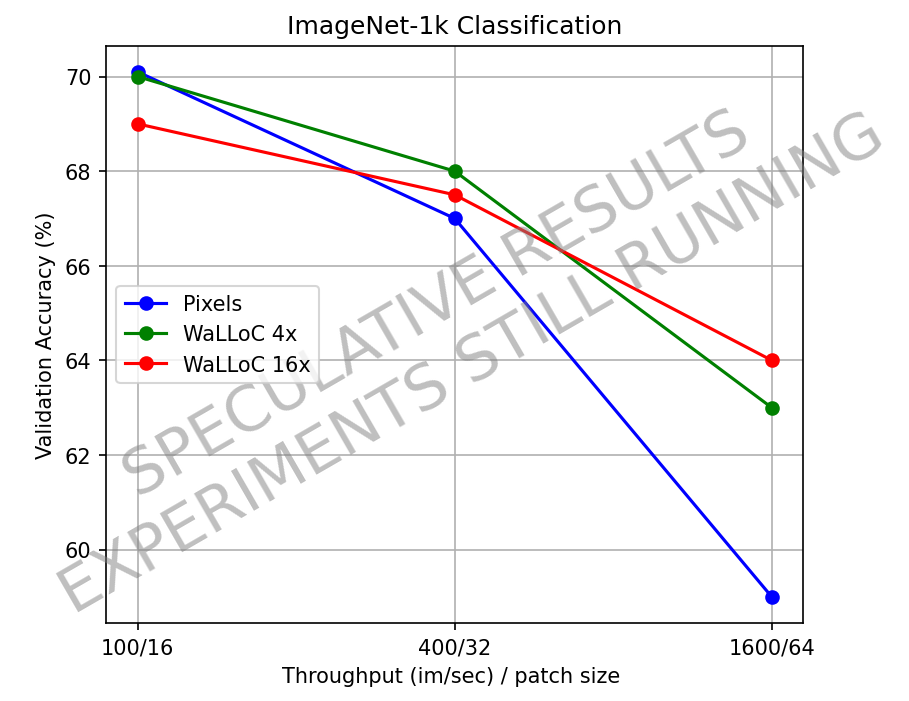

In [4]:
patch_sizes = [1, 2, 3]
pixels_acc = [70.1, 67., 59.]
walloc_4x_acc = [70.0, 68., 63.]
walloc_16x_acc = [69, 67.5, 64.]

plt.figure(figsize=(6, 5), dpi=150)
plt.plot(patch_sizes, pixels_acc, marker='o', label='Pixels', color='blue')
ax = plt.gca()
ax.plot(patch_sizes, walloc_4x_acc, marker='o', label='WaLLoC 4x', color='green')
ax.plot(patch_sizes, walloc_16x_acc, marker='o', label='WaLLoC 16x', color='red')

ax.set_title('ImageNet-1k Classification')
ax.set_xlabel('Throughput (im/sec) / patch size ')
ax.set_ylabel('Validation Accuracy (%)')
ax.grid(True)
ax.set_xticks(patch_sizes)
ax.set_xticklabels(['100/16', '400/32', '1600/64'])
ax.legend(loc='center left')

ax.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
         fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
         transform=plt.gca().transAxes);


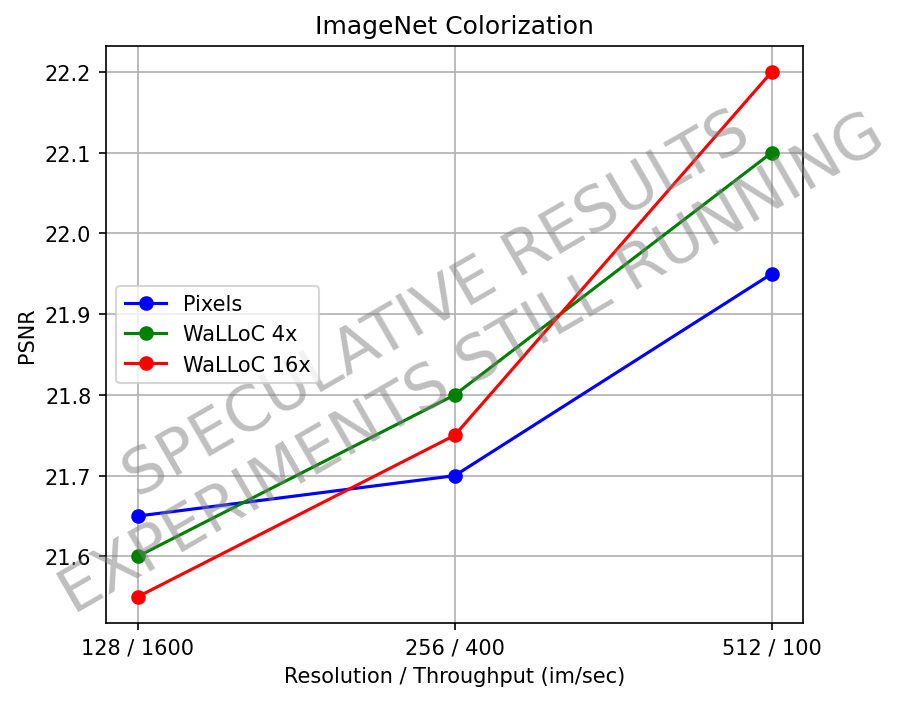

In [6]:
patch_sizes = [1, 2, 3]
pixels_psnr = [21.65, 21.7, 21.95]
walloc_4x_psnr = [21.6, 21.8, 22.1]
walloc_16x_psnr = [21.55, 21.75, 22.2]

plt.figure(figsize=(6, 5), dpi=150)
plt.plot(patch_sizes, pixels_psnr, marker='o', label='Pixels', color='blue')
ax = plt.gca()
ax.plot(patch_sizes, walloc_4x_psnr, marker='o', label='WaLLoC 4x', color='green')
ax.plot(patch_sizes, walloc_16x_psnr, marker='o', label='WaLLoC 16x', color='red')

ax.set_title('ImageNet Colorization')
ax.set_xlabel('Resolution / Throughput (im/sec)')
ax.set_ylabel('PSNR')
ax.grid(True)
ax.set_xticks(patch_sizes)
ax.set_xticklabels(['128 / 1600', '256 / 400', '512 / 100'])
ax.legend(loc='center left')

ax.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
         fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
         transform=plt.gca().transAxes);
# ax.invert_xaxis()

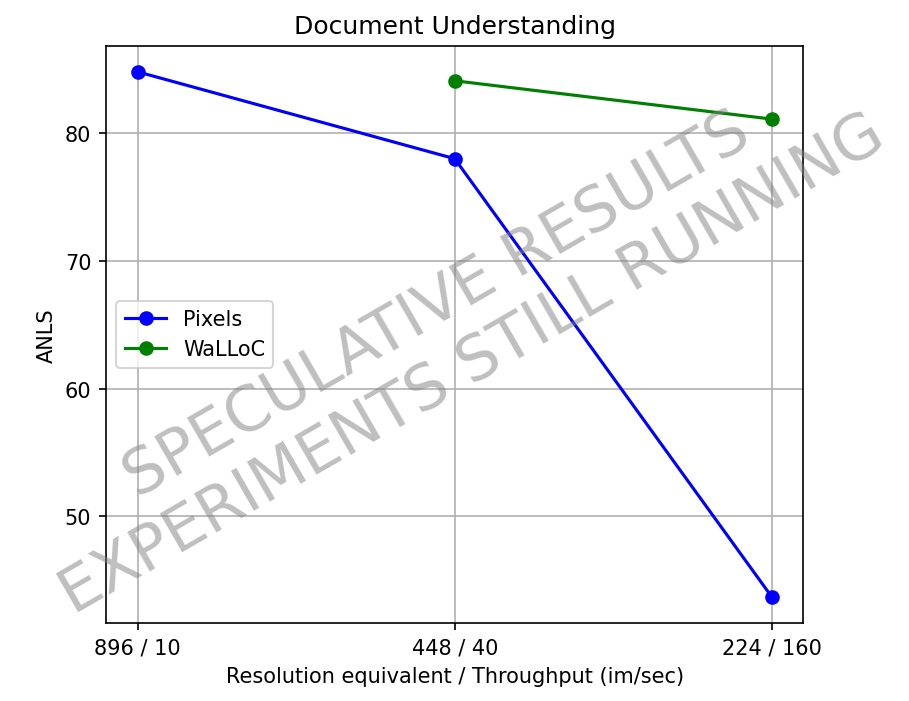

In [7]:
seq_length = [224, 448, 896]
pixels_anls = [43.7, 78.0, 84.8]
walloc_anls = [81.1, 84.1, np.nan]

plt.figure(figsize=(6, 5), dpi=150)
plt.plot(patch_sizes, pixels_anls, marker='o', label='Pixels', color='blue')
ax = plt.gca()
ax.plot(patch_sizes, walloc_anls, marker='o', label='WaLLoC', color='green')
ax.legend(loc='center left')

ax.set_title('Document Understanding')
ax.set_xlabel('Resolution equivalent / Throughput (im/sec)')
ax.set_ylabel('ANLS')
ax.grid(True)
ax.set_xticks(patch_sizes)
ax.set_xticklabels(['224 / 160', '448 / 40', '896 / 10']);
ax.invert_xaxis()

ax.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
         fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
         transform=plt.gca().transAxes);

In [8]:
for d in range(4):
    cf = f"log_cuda:{d}.pth"
    checkpoint = torch.load(cf,map_location="cpu")
    print(checkpoint['i_epoch'])
    print(checkpoint['valid_acc'][-1],"\n---\n")

3
0.18846 
---

3
0.20308 
---

6
0.37114 
---

9
0.46108 
---

